# Replication: CS-Flow MVTec AD Cable, rotated

In this notebook, we rotate the training data for the MVTec AD category *cable*.

25% of all data is each 0°, 90°, 180°, and 270° rotated.

In [1]:
from __init__ import activate_cs_flow_config, CSFLOW_DIR
import shutil

# First, we activate the correct configuration.
activate_cs_flow_config(name='mvtec-cable-rotated')

# Extracting Features

In [2]:
import os
import numpy as np
from src.repos.cs_flow.utils import load_datasets, make_dataloaders
from src.repos.cs_flow.extract_features import extract
import src.repos.cs_flow.config as c


prepend_dir = str(CSFLOW_DIR.resolve()) + '/'
export_name = c.class_name
export_dir = prepend_dir + 'data/features/' + export_name + '/'
image_paths = export_dir + c.class_name + '_image_paths.npy'
c.pre_extracted = False
os.makedirs(export_dir, exist_ok=True)
train_set, test_set = load_datasets(prepend_dir + c.dataset_path, c.class_name)
train_loader, test_loader = make_dataloaders(train_set, test_set)

In [3]:
from pathlib import Path

if not Path(image_paths).exists():
    extract(train_loader, test_loader, export_dir, c.class_name)
    paths = [p for p, l in test_set.samples]
    np.save(export_dir + c.class_name + '_image_paths.npy', paths)

Loaded pretrained weights for efficientnet-b5


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:02<00:27,  2.08s/it]

 14%|█▍        | 2/14 [00:03<00:18,  1.51s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.18s/it]

 50%|█████     | 7/14 [00:08<00:07,  1.13s/it]

 57%|█████▋    | 8/14 [00:09<00:06,  1.12s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.09s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.10s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.12s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.11s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.11s/it]

100%|██████████| 14/14 [00:16<00:00,  1.09s/it]

100%|██████████| 14/14 [00:16<00:00,  1.18s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:01<00:09,  1.05s/it]

 20%|██        | 2/10 [00:02<00:09,  1.13s/it]

 30%|███       | 3/10 [00:03<00:08,  1.16s/it]

 40%|████      | 4/10 [00:04<00:06,  1.15s/it]

 50%|█████     | 5/10 [00:05<00:05,  1.11s/it]

 60%|██████    | 6/10 [00:06<00:04,  1.08s/it]

 70%|███████   | 7/10 [00:07<00:03,  1.09s/it]

 80%|████████  | 8/10 [00:08<00:02,  1.10s/it]

 90%|█████████ | 9/10 [00:10<00:01,  1.12s/it]

100%|██████████| 10/10 [00:11<00:00,  1.15s/it]

100%|██████████| 10/10 [00:11<00:00,  1.12s/it]

# Training

In [4]:
from src.repos.cs_flow.train import train

results = train(train_loader, test_loader)
if isinstance(results, tuple):
    model = results[0]
    print(results[1:])
else:
    model = results

Loaded pretrained weights for efficientnet-b5

Train epoch 0


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.42s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:15,  1.53s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.46s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.44s/it]

 50%|█████     | 7/14 [00:10<00:09,  1.41s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.38s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.34s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

Epoch: 0.0 	 train loss: 14.8882


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.47s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.44s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.40s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.40s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.43s/it]

 50%|█████     | 7/14 [00:09<00:10,  1.43s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.44s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.41s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.39s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.39s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.40s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.38s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.41s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.43s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.41s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.42s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

Epoch: 0.4 	 train loss: 7.3726


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.43s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.41s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.40s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.39s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.42s/it]

100%|██████████| 14/14 [00:19<00:00,  1.43s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.41s/it]

 14%|█▍        | 2/14 [00:02<00:18,  1.50s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.39s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.49s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.47s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.40s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.47s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

Epoch: 0.8 	 train loss: 2.2778


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.44s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.39s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.38s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.40s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.40s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.39s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

Epoch: 0.12 	 train loss: 1.9723


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.39s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.42s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.39s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.46s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.45s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.42s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.39s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.37s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.38s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.39s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.42s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

Epoch: 0.16 	 train loss: 1.9245


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.43s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.40s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.37s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.40s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.38s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.40s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.38s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

Epoch: 0.20 	 train loss: 1.9026


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.41s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.40s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.42s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.45s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.42s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.40s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.25s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.21s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.18s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.21s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.38s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

Epoch: 0.24 	 train loss: 1.8813


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.40s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:20,  1.58s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.48s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.40s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.41s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.40s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.40s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.38s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:19<00:00,  1.30s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.39s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.39s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

Epoch: 0.28 	 train loss: 1.8596


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.40s/it]

100%|██████████| 14/14 [00:18<00:00,  1.40s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.41s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.46s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.46s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.41s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.40s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.45s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.42s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.40s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.41s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.42s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.42s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

Epoch: 0.32 	 train loss: 1.8214


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.40s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.39s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

Epoch: 0.36 	 train loss: 1.7866


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.40s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.39s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.17s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.19s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.41s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.40s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.42s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.41s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.41s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.47s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.34s/it]

100%|██████████| 14/14 [00:19<00:00,  1.33s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.38s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.43s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.43s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.41s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.38s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

Epoch: 0.40 	 train loss: 1.7406


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.42s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.41s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.41s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.39s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:21,  1.66s/it]

 14%|█▍        | 2/14 [00:03<00:18,  1.51s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.44s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.42s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.49s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.44s/it]

 50%|█████     | 7/14 [00:10<00:09,  1.38s/it]

 57%|█████▋    | 8/14 [00:11<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.48s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.40s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.48s/it]

 43%|████▎     | 6/14 [00:08<00:12,  1.51s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.46s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.43s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:15<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.34s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.43s/it]

 14%|█▍        | 2/14 [00:02<00:18,  1.51s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.53s/it]

 29%|██▊       | 4/14 [00:06<00:15,  1.52s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.42s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.39s/it]

 50%|█████     | 7/14 [00:10<00:09,  1.42s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.44s/it]

 64%|██████▍   | 9/14 [00:13<00:07,  1.43s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.47s/it]

 79%|███████▊  | 11/14 [00:16<00:04,  1.46s/it]

 86%|████████▌ | 12/14 [00:17<00:02,  1.44s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.38s/it]

100%|██████████| 14/14 [00:20<00:00,  1.39s/it]

100%|██████████| 14/14 [00:20<00:00,  1.43s/it]

Epoch: 0.44 	 train loss: 1.7182


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.43s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.42s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.43s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.44s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.42s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.39s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.41s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.39s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.38s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.43s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.40s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.42s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.42s/it]

100%|██████████| 14/14 [00:19<00:00,  1.44s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.41s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.43s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.47s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.49s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.42s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:15<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.51s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

Epoch: 0.48 	 train loss: 1.6900


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.32s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.20s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.19s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.20s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.30s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.23s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.32s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

Epoch: 0.52 	 train loss: 1.6515


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.20s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.22s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

Epoch: 0.56 	 train loss: 1.6319


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.38s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.30s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.22s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]


Compute loss and scores on test set:


  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:01<00:12,  1.39s/it]

 20%|██        | 2/10 [00:02<00:10,  1.31s/it]

 30%|███       | 3/10 [00:03<00:09,  1.30s/it]

 40%|████      | 4/10 [00:05<00:07,  1.27s/it]

 50%|█████     | 5/10 [00:06<00:06,  1.24s/it]

 60%|██████    | 6/10 [00:07<00:04,  1.23s/it]

 70%|███████   | 7/10 [00:08<00:03,  1.23s/it]

 80%|████████  | 8/10 [00:10<00:02,  1.24s/it]

 90%|█████████ | 9/10 [00:11<00:01,  1.29s/it]

100%|██████████| 10/10 [00:12<00:00,  1.33s/it]

100%|██████████| 10/10 [00:12<00:00,  1.29s/it]

Epoch: 0 	 test_loss: 1.6264
AUROC: 	 last: 0.8944 	 max: 0.8944 	 epoch_max: 0 	 epoch_loss: 0

Train epoch 1


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.38s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.40s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:17<00:00,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.38s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.42s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.42s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.38s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.22s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.20s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.19s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.19s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.18s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.38s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.41s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.38s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.33s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.49s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.40s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.40s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.39s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.21s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.32s/it]

100%|██████████| 14/14 [00:17<00:00,  1.30s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.40s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.40s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.21s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.19s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.32s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.22s/it]

100%|██████████| 14/14 [00:17<00:00,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.22s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.20s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.42s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.38s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.26s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.17s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.18s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.20s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.21s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.21s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.22s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.22s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.39s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.20s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.21s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.20s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.19s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]


Compute loss and scores on test set:


  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:01<00:11,  1.25s/it]

 20%|██        | 2/10 [00:02<00:09,  1.22s/it]

 30%|███       | 3/10 [00:03<00:08,  1.23s/it]

 40%|████      | 4/10 [00:04<00:07,  1.20s/it]

 50%|█████     | 5/10 [00:06<00:05,  1.19s/it]

 60%|██████    | 6/10 [00:07<00:04,  1.19s/it]

 70%|███████   | 7/10 [00:08<00:03,  1.18s/it]

 80%|████████  | 8/10 [00:09<00:02,  1.19s/it]

 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]

100%|██████████| 10/10 [00:12<00:00,  1.21s/it]

100%|██████████| 10/10 [00:12<00:00,  1.21s/it]

Epoch: 1 	 test_loss: 1.3762
AUROC: 	 last: 0.9344 	 max: 0.9344 	 epoch_max: 1 	 epoch_loss: 0

Train epoch 2


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.20s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.21s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.20s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.20s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:14,  1.15s/it]

 14%|█▍        | 2/14 [00:02<00:13,  1.15s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.21s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.20s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.19s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.17s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.22s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.20s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.22s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.22s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.19s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.40s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.41s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.44s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.45s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.41s/it]

 50%|█████     | 7/14 [00:09<00:10,  1.43s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.41s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.41s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.45s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.45s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.43s/it]

100%|██████████| 14/14 [00:19<00:00,  1.43s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.39s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.41s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.39s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.38s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.38s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.40s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.41s/it]

 50%|█████     | 7/14 [00:09<00:10,  1.44s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.44s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.42s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.48s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.45s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.41s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.40s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.38s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.39s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.45s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.39s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.42s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.40s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.41s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.45s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.42s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.38s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.39s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.40s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.48s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.51s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.49s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.46s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.42s/it]

 50%|█████     | 7/14 [00:10<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.39s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.41s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.39s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.42s/it]

 86%|████████▌ | 12/14 [00:17<00:02,  1.44s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.45s/it]

100%|██████████| 14/14 [00:20<00:00,  1.45s/it]

100%|██████████| 14/14 [00:20<00:00,  1.44s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.48s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.47s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.46s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.40s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.44s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.40s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.39s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.26s/it]

100%|██████████| 14/14 [00:18<00:00,  1.26s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.33s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.44s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.40s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.44s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.47s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.52s/it]

 43%|████▎     | 6/14 [00:08<00:12,  1.51s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.48s/it]

 57%|█████▋    | 8/14 [00:11<00:09,  1.51s/it]

 64%|██████▍   | 9/14 [00:13<00:07,  1.48s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.42s/it]

 79%|███████▊  | 11/14 [00:16<00:04,  1.45s/it]

 86%|████████▌ | 12/14 [00:17<00:02,  1.44s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.44s/it]

100%|██████████| 14/14 [00:20<00:00,  1.41s/it]

100%|██████████| 14/14 [00:20<00:00,  1.45s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.40s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.38s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.37s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.41s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.39s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.33s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.20s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.42s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.44s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.42s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.42s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.41s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.25s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.38s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.20s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.20s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.19s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.21s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.20s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.20s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.40s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.39s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.40s/it]

100%|██████████| 14/14 [00:18<00:00,  1.41s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.45s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.39s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.38s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.42s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.42s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.49s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.46s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]


Compute loss and scores on test set:


  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:01<00:11,  1.32s/it]

 20%|██        | 2/10 [00:02<00:10,  1.26s/it]

 30%|███       | 3/10 [00:03<00:09,  1.31s/it]

 40%|████      | 4/10 [00:05<00:07,  1.30s/it]

 50%|█████     | 5/10 [00:06<00:06,  1.33s/it]

 60%|██████    | 6/10 [00:07<00:05,  1.36s/it]

 70%|███████   | 7/10 [00:09<00:04,  1.38s/it]

 80%|████████  | 8/10 [00:10<00:02,  1.40s/it]

 90%|█████████ | 9/10 [00:12<00:01,  1.37s/it]

100%|██████████| 10/10 [00:13<00:00,  1.37s/it]

100%|██████████| 10/10 [00:13<00:00,  1.35s/it]

Epoch: 2 	 test_loss: 1.3742
AUROC: 	 last: 0.9393 	 max: 0.9393 	 epoch_max: 2 	 epoch_loss: 0

Train epoch 3


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.42s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.49s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.54s/it]

 29%|██▊       | 4/14 [00:06<00:15,  1.53s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.50s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.46s/it]

 50%|█████     | 7/14 [00:10<00:09,  1.43s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.39s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:17<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.42s/it]

100%|██████████| 14/14 [00:19<00:00,  1.42s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.40s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.43s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.44s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.40s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.40s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.39s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.39s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:15<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:19<00:00,  1.33s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.48s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.48s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.42s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.45s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.41s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.39s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.47s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.39s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.40s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.46s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.47s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.48s/it]

100%|██████████| 14/14 [00:19<00:00,  1.46s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.42s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:18<00:00,  1.24s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.49s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.38s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.26s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.41s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.18s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.33s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.46s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.48s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.44s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.40s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.17s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.43s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.39s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.25s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.41s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.43s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.42s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.42s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.40s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.41s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.39s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.47s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.44s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.44s/it]

100%|██████████| 14/14 [00:19<00:00,  1.42s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.40s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.40s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.42s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.52s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.46s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.44s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.45s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:14,  1.15s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.22s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.41s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.44s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.43s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.40s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.44s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.46s/it]

100%|██████████| 14/14 [00:19<00:00,  1.43s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:11<00:05,  1.20s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.21s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.22s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.20s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.20s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.21s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.23s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.21s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.20s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.21s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.19s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.21s/it]

100%|██████████| 14/14 [00:16<00:00,  1.18s/it]

100%|██████████| 14/14 [00:16<00:00,  1.21s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.19s/it]

 21%|██▏       | 3/14 [00:03<00:12,  1.17s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.19s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.19s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.22s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.21s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.20s/it]

100%|██████████| 14/14 [00:16<00:00,  1.18s/it]

100%|██████████| 14/14 [00:16<00:00,  1.20s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.21s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.20s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.22s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.19s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.18s/it]

100%|██████████| 14/14 [00:17<00:00,  1.20s/it]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.17s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.19s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.22s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.21s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.20s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.22s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.18s/it]

 14%|█▍        | 2/14 [00:02<00:13,  1.15s/it]

 21%|██▏       | 3/14 [00:03<00:12,  1.15s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.14s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.15s/it]

 43%|████▎     | 6/14 [00:06<00:09,  1.15s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.15s/it]

 57%|█████▋    | 8/14 [00:09<00:06,  1.15s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.15s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.16s/it]

 79%|███████▊  | 11/14 [00:12<00:03,  1.15s/it]

 86%|████████▌ | 12/14 [00:13<00:02,  1.16s/it]

 93%|█████████▎| 13/14 [00:14<00:01,  1.15s/it]

100%|██████████| 14/14 [00:16<00:00,  1.15s/it]

100%|██████████| 14/14 [00:16<00:00,  1.15s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:14,  1.13s/it]

 14%|█▍        | 2/14 [00:02<00:13,  1.14s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.19s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.17s/it]

 21%|██▏       | 3/14 [00:03<00:12,  1.17s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.17s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.18s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.17s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.19s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.19s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.21s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.20s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.19s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.20s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.18s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.20s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.20s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.19s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.19s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.17s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.19s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.18s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.20s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.20s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.19s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.19s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.20s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.20s/it]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.17s/it]

 14%|█▍        | 2/14 [00:02<00:13,  1.15s/it]

 21%|██▏       | 3/14 [00:03<00:12,  1.14s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.16s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.15s/it]

 43%|████▎     | 6/14 [00:06<00:09,  1.18s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.16s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.18s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.23s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.21s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.20s/it]

100%|██████████| 14/14 [00:16<00:00,  1.18s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:14,  1.14s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.20s/it]

 21%|██▏       | 3/14 [00:03<00:12,  1.18s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.16s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.17s/it]

 43%|████▎     | 6/14 [00:06<00:09,  1.15s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.15s/it]

 57%|█████▋    | 8/14 [00:09<00:06,  1.15s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.15s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.16s/it]

 79%|███████▊  | 11/14 [00:12<00:03,  1.15s/it]

 86%|████████▌ | 12/14 [00:13<00:02,  1.16s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.19s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

100%|██████████| 14/14 [00:16<00:00,  1.17s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.18s/it]

 14%|█▍        | 2/14 [00:02<00:13,  1.16s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.20s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.20s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.20s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.18s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.17s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.17s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.19s/it]

100%|██████████| 14/14 [00:16<00:00,  1.18s/it]

100%|██████████| 14/14 [00:16<00:00,  1.20s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:14,  1.14s/it]

 14%|█▍        | 2/14 [00:02<00:13,  1.16s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.18s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.19s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.17s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.19s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.19s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.20s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.23s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.21s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.23s/it]

100%|██████████| 14/14 [00:16<00:00,  1.21s/it]

100%|██████████| 14/14 [00:16<00:00,  1.20s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.18s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.19s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.20s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.20s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.21s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.20s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.21s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.19s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.21s/it]

100%|██████████| 14/14 [00:16<00:00,  1.18s/it]

100%|██████████| 14/14 [00:16<00:00,  1.20s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:14,  1.13s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.21s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.21s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.18s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.18s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.17s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.17s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.16s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.15s/it]

 79%|███████▊  | 11/14 [00:12<00:03,  1.16s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.16s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.16s/it]

100%|██████████| 14/14 [00:16<00:00,  1.16s/it]

100%|██████████| 14/14 [00:16<00:00,  1.17s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.20s/it]

 14%|█▍        | 2/14 [00:02<00:13,  1.16s/it]

 21%|██▏       | 3/14 [00:03<00:12,  1.14s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.17s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.16s/it]

 43%|████▎     | 6/14 [00:06<00:09,  1.17s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.16s/it]

 57%|█████▋    | 8/14 [00:09<00:06,  1.16s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.20s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.20s/it]

 79%|███████▊  | 11/14 [00:12<00:03,  1.19s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.17s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.17s/it]

100%|██████████| 14/14 [00:16<00:00,  1.18s/it]

100%|██████████| 14/14 [00:16<00:00,  1.18s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.20s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.19s/it]

 21%|██▏       | 3/14 [00:03<00:12,  1.16s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.17s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.19s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.17s/it]

 57%|█████▋    | 8/14 [00:09<00:06,  1.16s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.17s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.16s/it]

 79%|███████▊  | 11/14 [00:12<00:03,  1.15s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.17s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.16s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

100%|██████████| 14/14 [00:16<00:00,  1.18s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.20s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.18s/it]

 21%|██▏       | 3/14 [00:03<00:12,  1.17s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.16s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.19s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.19s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.20s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.18s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.21s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.20s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.20s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.20s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.18s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.18s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.17s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.16s/it]

 57%|█████▋    | 8/14 [00:09<00:06,  1.16s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.18s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.20s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.21s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.20s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.20s/it]

100%|██████████| 14/14 [00:16<00:00,  1.18s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:14,  1.14s/it]

 14%|█▍        | 2/14 [00:02<00:13,  1.14s/it]

 21%|██▏       | 3/14 [00:03<00:12,  1.14s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.21s/it]

 36%|███▌      | 5/14 [00:05<00:11,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.23s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]


Compute loss and scores on test set:


  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:01<00:10,  1.18s/it]

 20%|██        | 2/10 [00:02<00:09,  1.21s/it]

 30%|███       | 3/10 [00:03<00:08,  1.16s/it]

 40%|████      | 4/10 [00:04<00:06,  1.15s/it]

 50%|█████     | 5/10 [00:05<00:05,  1.13s/it]

 60%|██████    | 6/10 [00:06<00:04,  1.11s/it]

 70%|███████   | 7/10 [00:08<00:03,  1.14s/it]

 80%|████████  | 8/10 [00:09<00:02,  1.14s/it]

 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]

100%|██████████| 10/10 [00:11<00:00,  1.12s/it]

100%|██████████| 10/10 [00:11<00:00,  1.14s/it]

Epoch: 3 	 test_loss: 1.5305
AUROC: 	 last: 0.9399 	 max: 0.9399 	 epoch_max: 3 	 epoch_loss: 0


(np.float64(0.9398510971786833), np.float64(0.9398510971786833), 0)


# Evaluation

In [5]:
localize = True
upscale_mode = 'bilinear'
score_export_dir = CSFLOW_DIR.joinpath('./viz/scores/', c.modelname)
os.makedirs(score_export_dir, exist_ok=True)
map_export_dir = CSFLOW_DIR.joinpath('./viz/maps/', c.modelname)
os.makedirs(map_export_dir, exist_ok=True)

Loaded pretrained weights for efficientnet-b5

Compute maps, loss and scores on test set:


  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:01<00:09,  1.07s/it]

 20%|██        | 2/10 [00:02<00:09,  1.14s/it]

 30%|███       | 3/10 [00:03<00:07,  1.10s/it]

 40%|████      | 4/10 [00:04<00:06,  1.14s/it]

 50%|█████     | 5/10 [00:05<00:05,  1.12s/it]

 60%|██████    | 6/10 [00:06<00:04,  1.12s/it]

 70%|███████   | 7/10 [00:07<00:03,  1.12s/it]

 80%|████████  | 8/10 [00:08<00:02,  1.10s/it]

 90%|█████████ | 9/10 [00:09<00:01,  1.09s/it]

100%|██████████| 10/10 [00:11<00:00,  1.12s/it]

100%|██████████| 10/10 [00:11<00:00,  1.11s/it]

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


AUC: 0.9399	Optimal Threshold: 1.1563
type: anomaly; min/max: 1.0029722452163696/12.693263053894043


type: anomaly; min/max: 0.9986631870269775/17.925121307373047


type: anomaly; min/max: 0.709105372428894/11.577115058898926


type: anomaly; min/max: 0.8909135460853577/12.05183219909668


type: anomaly; min/max: 1.0041126012802124/7.8938398361206055


type: anomaly; min/max: 1.1099714040756226/8.572665214538574


type: anomaly; min/max: 0.8006746172904968/13.647562980651855


type: anomaly; min/max: 0.985923171043396/7.490011692047119


type: anomaly; min/max: 0.9296863079071045/36.0768928527832


type: anomaly; min/max: 0.960484504699707/5.68575382232666


type: anomaly; min/max: 1.1252962350845337/7.686131477355957


type: anomaly; min/max: 0.8377509713172913/8.382719993591309


type: anomaly; min/max: 0.8177324533462524/13.094522476196289


type: anomaly; min/max: 0.9148751497268677/21.140029907226562


type: anomaly; min/max: 1.0580610036849976/19.06422233581543


type: anomaly; min/max: 1.0731972455978394/7.928338527679443


type: anomaly; min/max: 0.7577030062675476/7.022906303405762


type: anomaly; min/max: 0.9268293976783752/9.171271324157715


type: anomaly; min/max: 0.5911672711372375/5.541407585144043


type: anomaly; min/max: 1.0017715692520142/6.5134663581848145


type: anomaly; min/max: 1.0626599788665771/9.345643043518066


type: anomaly; min/max: 0.806928813457489/6.851263999938965


type: anomaly; min/max: 0.8788032531738281/8.228043556213379


type: anomaly; min/max: 0.8417333364486694/5.696222305297852


type: anomaly; min/max: 0.8442727327346802/8.502033233642578


type: anomaly; min/max: 0.9106382131576538/7.923947334289551


type: anomaly; min/max: 2.0069797039031982/20.983867645263672


type: anomaly; min/max: 1.231162428855896/9.591614723205566


type: anomaly; min/max: 0.8413662314414978/10.058611869812012


type: anomaly; min/max: 0.8280333876609802/9.485198020935059


type: anomaly; min/max: 0.6765681505203247/5.540619373321533


type: anomaly; min/max: 1.0844696760177612/7.476576805114746


type: anomaly; min/max: 1.0244590044021606/6.753391265869141


type: anomaly; min/max: 0.9755577445030212/3.4178552627563477


type: anomaly; min/max: 0.921506404876709/7.577273845672607


type: anomaly; min/max: 0.6971272230148315/5.451842308044434


type: anomaly; min/max: 0.7510882616043091/3.539719820022583


type: anomaly; min/max: 0.7662606835365295/3.4999146461486816


type: anomaly; min/max: 0.789219856262207/4.149894714355469


type: anomaly; min/max: 0.7182139754295349/5.318652153015137


type: anomaly; min/max: 1.0340428352355957/4.7617316246032715


type: anomaly; min/max: 0.9804307818412781/5.250796318054199


type: anomaly; min/max: 1.046576976776123/3.731980085372925


type: anomaly; min/max: 0.914142906665802/3.919489860534668


type: good; min/max: 0.8180496692657471/2.9532485008239746


type: good; min/max: 0.6154884696006775/2.9749555587768555


type: good; min/max: 1.0021226406097412/2.9324817657470703


type: good; min/max: 0.886427104473114/3.828371047973633


type: good; min/max: 1.0100992918014526/3.309159755706787


type: good; min/max: 0.6592822670936584/4.442581653594971


type: good; min/max: 0.982968270778656/3.223501682281494


type: good; min/max: 0.8663419485092163/4.40341329574585


type: good; min/max: 0.9608054161071777/2.738640546798706


type: good; min/max: 0.7966753244400024/7.4957194328308105


type: good; min/max: 0.9840646386146545/3.214334487915039


type: good; min/max: 0.8252040147781372/2.783428907394409


type: good; min/max: 0.8598758578300476/4.3780694007873535


type: good; min/max: 0.8522463440895081/3.4732666015625


type: good; min/max: 0.8115280866622925/4.715070724487305


type: good; min/max: 0.9846760630607605/3.729015827178955


type: good; min/max: 1.068670630455017/3.210768938064575


type: good; min/max: 0.9077362418174744/2.9156713485717773


type: good; min/max: 0.9700154662132263/3.546229124069214


type: good; min/max: 1.0268332958221436/4.0315022468566895


type: good; min/max: 0.9103710651397705/3.2330856323242188


type: good; min/max: 0.9245374798774719/3.5075647830963135


type: good; min/max: 0.8379553556442261/3.186422348022461


type: good; min/max: 0.8814699053764343/2.788571834564209


type: good; min/max: 0.9556860327720642/2.9386110305786133


type: good; min/max: 0.8143885731697083/2.66389799118042


type: good; min/max: 0.9562281370162964/2.8620214462280273


type: good; min/max: 1.006919264793396/5.402100086212158


type: good; min/max: 0.7599302530288696/3.4055798053741455


type: good; min/max: 1.005037546157837/3.8089241981506348


type: good; min/max: 1.0337233543395996/3.5030715465545654


type: good; min/max: 0.870263934135437/3.1865265369415283


type: good; min/max: 0.9709267020225525/3.016935348510742


type: good; min/max: 0.7364588379859924/4.2971649169921875


type: good; min/max: 0.7628874778747559/3.5630362033843994


type: good; min/max: 0.8439118266105652/2.839606761932373


type: good; min/max: 0.9041762948036194/3.80045223236084


type: good; min/max: 0.8825569152832031/3.400071859359741


type: good; min/max: 0.860691249370575/3.980602264404297


type: good; min/max: 0.5910124778747559/3.0434234142303467


type: good; min/max: 0.7387145161628723/3.7080414295196533


type: good; min/max: 0.9485755562782288/3.0036211013793945


type: good; min/max: 0.9351189136505127/3.1600944995880127


type: good; min/max: 0.9696843028068542/3.4795589447021484


type: good; min/max: 1.1166174411773682/3.4620752334594727


type: good; min/max: 0.6726869940757751/7.568383693695068


type: good; min/max: 0.6237196922302246/4.237277984619141


type: good; min/max: 0.9104359745979309/3.494157075881958


type: good; min/max: 0.7555524110794067/3.0150578022003174


type: good; min/max: 0.9182777404785156/2.7724788188934326


type: good; min/max: 0.985558271408081/3.629361629486084


type: good; min/max: 1.060011863708496/3.5684280395507812


type: good; min/max: 0.8556509613990784/3.429265022277832


type: good; min/max: 0.9641140103340149/4.286703109741211


type: good; min/max: 0.9544927477836609/3.3347725868225098


type: good; min/max: 1.092434048652649/3.23771595954895


type: good; min/max: 0.9512647986412048/5.078486919403076


type: good; min/max: 1.0116007328033447/3.658423662185669


type: good; min/max: 0.7128414511680603/3.9487500190734863


type: good; min/max: 0.7972599864006042/4.536961078643799


type: good; min/max: 0.9639886617660522/4.343592166900635


type: good; min/max: 0.7741228342056274/4.20792293548584


type: good; min/max: 0.9988108277320862/3.2317183017730713


type: good; min/max: 0.7921071648597717/3.551464319229126


type: good; min/max: 0.7903288006782532/3.78900146484375


type: good; min/max: 1.0964407920837402/3.3368403911590576


type: good; min/max: 1.023668885231018/4.751771926879883


type: good; min/max: 0.787062406539917/5.923820972442627


type: good; min/max: 0.9193841814994812/3.9917714595794678


type: good; min/max: 0.8961994051933289/3.8675687313079834


type: good; min/max: 0.8438974618911743/3.9569461345672607


type: good; min/max: 0.663661777973175/3.2909440994262695


type: good; min/max: 1.0453981161117554/4.945013046264648


type: good; min/max: 0.9812520146369934/4.560619354248047


type: good; min/max: 0.8842394948005676/3.6422557830810547


type: good; min/max: 0.8151634931564331/3.6897737979888916


type: good; min/max: 0.6393886208534241/4.252288818359375


type: good; min/max: 0.7415934801101685/3.511875867843628


type: good; min/max: 1.0325576066970825/4.225114345550537


type: good; min/max: 0.7581712007522583/5.2818427085876465


type: good; min/max: 0.6867900490760803/3.6888904571533203


type: good; min/max: 0.9916556477546692/3.4820940494537354


type: good; min/max: 0.7970737814903259/3.6069252490997314


type: good; min/max: 0.6702936887741089/3.5386791229248047


type: good; min/max: 0.9248437881469727/3.712876796722412


type: good; min/max: 0.9471480250358582/3.403324604034424


type: good; min/max: 0.8461275696754456/3.614903688430786


type: good; min/max: 0.8444100618362427/3.933680295944214


type: good; min/max: 1.1435636281967163/3.447683572769165


type: good; min/max: 0.8821018934249878/3.7829086780548096


type: good; min/max: 0.9815367460250854/3.775275468826294


type: good; min/max: 0.9109677672386169/3.828033924102783


type: good; min/max: 0.9417758584022522/4.137627601623535


type: good; min/max: 0.7283567190170288/4.125214099884033


type: good; min/max: 1.0406168699264526/3.3224892616271973


type: good; min/max: 0.9895250201225281/4.538450241088867


type: good; min/max: 1.0084525346755981/4.94468355178833


type: good; min/max: 0.9022979736328125/3.9615302085876465


type: good; min/max: 0.8229116797447205/4.256382942199707


type: good; min/max: 1.0497937202453613/3.907896041870117


type: good; min/max: 0.8096238374710083/4.422460556030273


type: good; min/max: 0.9230191111564636/4.527787685394287


type: good; min/max: 0.9007309675216675/4.436200141906738


type: good; min/max: 0.6469038128852844/6.182794570922852


type: good; min/max: 0.6822187304496765/4.965785503387451


type: good; min/max: 0.9265069961547852/3.9561712741851807


type: good; min/max: 1.092923641204834/4.307465076446533


type: good; min/max: 0.9923943281173706/3.6434223651885986


type: good; min/max: 0.8937746286392212/3.6312477588653564


type: good; min/max: 1.0440309047698975/4.2784423828125


type: good; min/max: 0.963994562625885/3.317167043685913


type: good; min/max: 1.0904611349105835/4.345420837402344


type: good; min/max: 0.9464204907417297/4.101240634918213


type: good; min/max: 0.8305634260177612/4.293755531311035


type: good; min/max: 0.6267765760421753/4.210554122924805


type: good; min/max: 0.8416264057159424/3.731673002243042


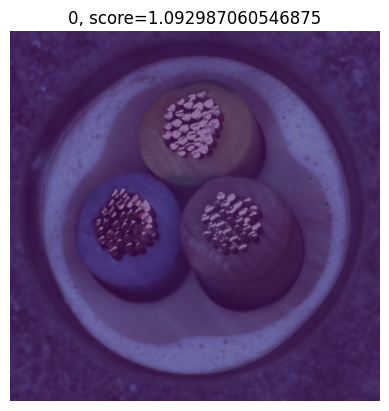

In [6]:
from src.repos.cs_flow.model import load_model
from src.repos.cs_flow.evaluate import evaluate

img_paths = test_set.paths if c.pre_extracted else [p for p, l in test_set.samples]
_, test_loader = make_dataloaders(train_set, test_set)
mod = load_model(c.modelname)
evaluate(mod, test_loader, score_export_dir, map_export_dir, img_paths, localize)